# TF-IDF Vectorization dan K-Means Clustering

Notebook ini melakukan:
1. Transformasi teks ke TF-IDF
2. Penentuan jumlah cluster optimal (Elbow Method & Silhouette Score)
3. K-Means Clustering
4. Interpretasi cluster untuk labeling sentimen

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Buat folder output jika belum ada
os.makedirs('output', exist_ok=True)
os.makedirs('output/models', exist_ok=True)

In [19]:
# Load data hasil preprocessing
df = pd.read_csv("data/hasil_preprocessing.csv")
print(f"Jumlah data: {len(df)}")
df.head()

Jumlah data: 4183


,full_text,tweet_url,original_text,cleaned_text,preprocessed_text
0,Ditarik karna blm lolos BPOM menurut sertifika...,https://x.com/undefined/status/200206085482159...,Ditarik karna blm lolos BPOM menurut sertifika...,ditarik karna blm lolos bpom menurut sertifika...,ditarik karna lolos bpom menurut sertifikasi h...
1,GUYSSSS... untuk kalian yang punya usaha makan...,https://x.com/undefined/status/199868753431095...,GUYSSSS... untuk kalian yang punya usaha makan...,guyssss untuk kalian yang punya usaha makananm...,guyssss punya usaha makananminuman didaftarin ...
2,UMKM WAJIB TAHU: Batas Sertifikasi Halal Kian ...,https://x.com/undefined/status/199839129209166...,UMKM WAJIB TAHU: Batas Sertifikasi Halal Kian ...,umkm wajib tahu batas sertifikasi halal kian d...,umkm wajib tahu batas sertifikasi halal kian d...
3,minimal lu taulah audience indo kek gimana soa...,https://x.com/undefined/status/199751040849691...,minimal lu taulah audience indo kek gimana soa...,minimal lu taulah audience indo kek gimana soa...,minimal taulah audience indo kek gimana soal m...
4,@Sentjoko @ChatGPTapp Jepang secara aktif memp...,https://x.com/undefined/status/199652135144902...,@Sentjoko @ChatGPTapp Jepang secara aktif memp...,jepang secara aktif mempromosikan makanan hala...,jepang aktif mempromosikan makanan halal menar...


## 1. TF-IDF Vectorization

In [20]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Batasi jumlah fitur
    min_df=2,           # Minimal muncul di 2 dokumen
    max_df=0.95         # Maksimal muncul di 95% dokumen
)

# Fit dan transform
tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_text'])

print(f"Dimensi TF-IDF Matrix: {tfidf_matrix.shape}")
print(f"Jumlah dokumen: {tfidf_matrix.shape[0]}")
print(f"Jumlah fitur (kata): {tfidf_matrix.shape[1]}")

Dimensi TF-IDF Matrix: (4183, 1000)
Jumlah dokumen: 4183
Jumlah fitur (kata): 1000


In [21]:
# Dapatkan nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nTop 20 fitur (kata):")
print(feature_names[:20])


Top 20 fitur (kata):
['abc' 'abdul' 'acara' 'aceh' 'acne' 'ada' 'adanya' 'agama' 'agustus'
 'ahmad' 'air' 'akal' 'akbp' 'akhir' 'akhirnya' 'akses' 'aksi' 'aktivis'
 'alasan' 'alat']


In [22]:
# Hitung rata-rata TF-IDF per kata
mean_tfidf = np.array(tfidf_matrix.mean(axis=0)).flatten()
tfidf_scores = list(zip(feature_names, mean_tfidf))
tfidf_scores_sorted = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

print("\nTop 20 kata dengan TF-IDF tertinggi:")
for word, score in tfidf_scores_sorted[:20]:
    print(f"{word}: {score:.4f}")


Top 20 kata dengan TF-IDF tertinggi:
halal: 0.0903
sertifikasi: 0.0668
haram: 0.0626
produk: 0.0544
bpom: 0.0404
apakah: 0.0403
indonesia: 0.0364
makanan: 0.0332
mui: 0.0315
ada: 0.0312
ulama: 0.0299
majelis: 0.0271
jadi: 0.0195
tapi: 0.0173
bpjph: 0.0146
umkm: 0.0141
buat: 0.0140
rasa: 0.0139
muslim: 0.0137
usaha: 0.0131


## 2. Penentuan Jumlah Cluster Optimal

In [23]:
# Elbow Method
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print("Menghitung Elbow dan Silhouette Score...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_matrix)
    inertias.append(kmeans.inertia_)
    
    # Silhouette Score
    labels = kmeans.labels_
    sil_score = silhouette_score(tfidf_matrix, labels)
    silhouette_scores.append(sil_score)
    
    print(f"k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={sil_score:.4f}")

Menghitung Elbow dan Silhouette Score...
k=2: Inertia=3888.70, Silhouette=0.0306
k=3: Inertia=3802.02, Silhouette=0.0391
k=4: Inertia=3759.95, Silhouette=0.0388
k=5: Inertia=3730.85, Silhouette=0.0389
k=6: Inertia=3710.17, Silhouette=0.0375
k=7: Inertia=3692.26, Silhouette=0.0380
k=8: Inertia=3676.42, Silhouette=0.0374
k=9: Inertia=3653.60, Silhouette=0.0389
k=10: Inertia=3647.53, Silhouette=0.0298


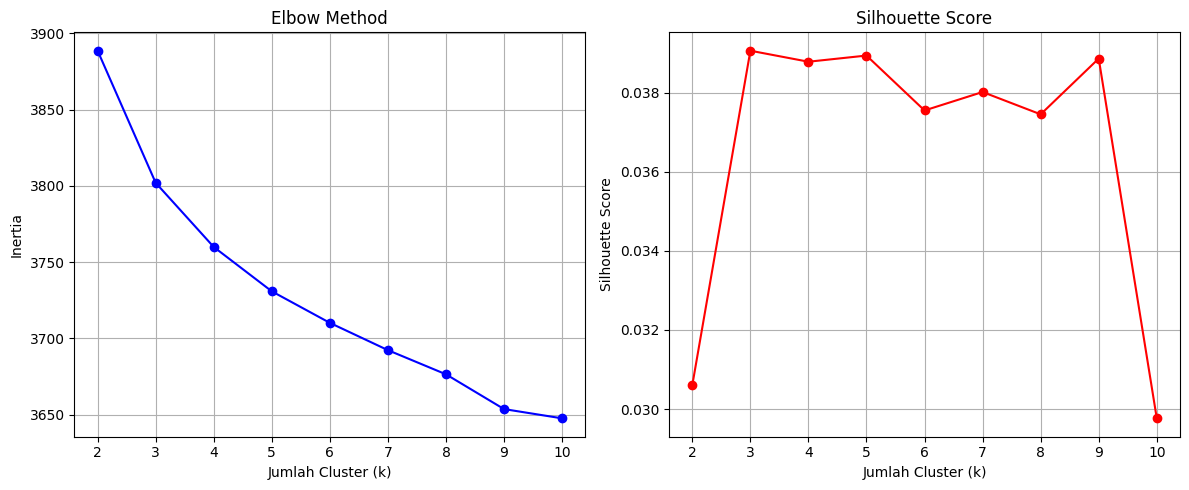


K optimal berdasarkan Silhouette Score: 3


In [24]:
# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_range)
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.savefig('output/elbow_silhouette.png', dpi=150, bbox_inches='tight')
plt.show()

# Tentukan k optimal
best_k = k_range[np.argmax(silhouette_scores)]
print(f"\nK optimal berdasarkan Silhouette Score: {best_k}")

## 3. K-Means Clustering

In [25]:
# Gunakan k=3 untuk sentimen (positif, negatif, netral)
n_clusters = 3

# Inisialisasi dan fit K-Means
kmeans = KMeans(
    n_clusters=n_clusters,
    random_state=42,
    n_init=10,
    max_iter=300
)

# Fit dan predict
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Tambahkan label ke DataFrame
df['cluster_label'] = cluster_labels

print(f"Clustering selesai dengan k={n_clusters}")
print(f"\nDistribusi cluster:")
print(df['cluster_label'].value_counts().sort_index())

Clustering selesai dengan k=3

Distribusi cluster:
cluster_label
0    3036
1     427
2     720
Name: count, dtype: int64


In [26]:
# Hitung Silhouette Score untuk k yang dipilih
final_silhouette = silhouette_score(tfidf_matrix, cluster_labels)
print(f"Silhouette Score (k={n_clusters}): {final_silhouette:.4f}")

Silhouette Score (k=3): 0.0391


## 4. Interpretasi Cluster

In [27]:
def get_top_terms_per_cluster(kmeans_model, vectorizer, n_terms=10):
    """
    Mendapatkan kata-kata dominan untuk setiap cluster.
    """
    cluster_centers = kmeans_model.cluster_centers_
    feature_names = vectorizer.get_feature_names_out()
    
    top_terms = {}
    for i, center in enumerate(cluster_centers):
        # Dapatkan indeks kata dengan nilai tertinggi
        top_indices = center.argsort()[-n_terms:][::-1]
        top_words = [feature_names[idx] for idx in top_indices]
        top_scores = [center[idx] for idx in top_indices]
        top_terms[i] = list(zip(top_words, top_scores))
    
    return top_terms

# Dapatkan top terms per cluster
top_terms = get_top_terms_per_cluster(kmeans, tfidf_vectorizer, n_terms=15)

print("Top 15 kata per cluster:")
print("="*60)
for cluster_id, terms in top_terms.items():
    print(f"\nCluster {cluster_id}:")
    for word, score in terms:
        print(f"  {word}: {score:.4f}")

Top 15 kata per cluster:

Cluster 0:
  halal: 0.0999
  sertifikasi: 0.0916
  haram: 0.0844
  produk: 0.0742
  makanan: 0.0447
  ada: 0.0407
  jadi: 0.0260
  tapi: 0.0229
  bpjph: 0.0200
  umkm: 0.0194
  buat: 0.0190
  muslim: 0.0183
  usaha: 0.0178
  babi: 0.0154
  minuman: 0.0148

Cluster 1:
  bpom: 0.3703
  apakah: 0.3689
  halal: 0.1663
  rasa: 0.1162
  cokelat: 0.0569
  cream: 0.0489
  serum: 0.0362
  body: 0.0346
  glow: 0.0318
  lotion: 0.0306
  brightening: 0.0297
  wafer: 0.0291
  biskuit: 0.0267
  krim: 0.0256
  skin: 0.0250

Cluster 2:
  ulama: 0.1677
  majelis: 0.1564
  indonesia: 0.1539
  mui: 0.1322
  ketua: 0.0563
  fatwa: 0.0479
  kabupaten: 0.0304
  kh: 0.0302
  kota: 0.0280
  islam: 0.0243
  jakarta: 0.0233
  jawa: 0.0231
  provinsi: 0.0221
  umum: 0.0214
  sound: 0.0212


In [28]:
# Contoh tweet per cluster
print("\nContoh tweet per cluster:")
print("="*60)
for cluster_id in range(n_clusters):
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_tweets = df[df['cluster_label'] == cluster_id]['cleaned_text'].head(3)
    for i, tweet in enumerate(cluster_tweets):
        print(f"{i+1}. {tweet[:100]}...")


Contoh tweet per cluster:

--- Cluster 0 ---
1. ditarik karna blm lolos bpom menurut sertifikasi halal dan kesesuaian pangan indo kenapa dikatakan m...
2. guyssss untuk kalian yang punya usaha makananminuman yang mau didaftarin sertifikasi halal boleh bgt...
3. umkm wajib tahu batas sertifikasi halal kian dekat mulai oktober produk makanan minuman dan hasil se...

--- Cluster 1 ---
1. apakah walls es krim rasa vanila dengan butiran biskuit oreo sudah bpom dan halal...
2. apakah walls feast es krim rasa vanila berlapis cokelat dan kacang vanila sudah bpom dan halal...
3. apakah walls feast es krim rasa cokelat berlapis cokelat dan kacang cokelat sudah bpom dan halal...

--- Cluster 2 ---
1. jajaran kpu kota probolinggo mengucapkan selamat dan sukses atas terselenggaranya musyawarah daerah ...
2. pdm purbalingga mengucapkan selamat dan sukses kepada dr h anwar abbas mm atas terpilihnya sebagai w...
3. anggota polsek sidayu hadir dalam rangka musyawarah daerah majelis ulama indonesia kec

## 5. Labeling Sentimen Manual

Berdasarkan kata-kata dominan di setiap cluster, lakukan labeling sentimen:
- Cluster dengan kata positif (bagus, baik, setuju, dll) → **Positif**
- Cluster dengan kata negatif (buruk, tolak, tidak, dll) → **Negatif**
- Cluster dengan kata netral (informasi, berita, dll) → **Netral**

In [29]:
# Mapping cluster ke sentimen (sesuaikan berdasarkan interpretasi)
# CATATAN: Mapping ini perlu disesuaikan setelah melihat hasil clustering
cluster_to_sentiment = {
    0: 'netral',
    1: 'positif',
    2: 'negatif'
}

# Apply mapping
df['sentiment'] = df['cluster_label'].map(cluster_to_sentiment)

print("Distribusi sentimen:")
print(df['sentiment'].value_counts())

Distribusi sentimen:
sentiment
netral     3036
negatif     720
positif     427
Name: count, dtype: int64


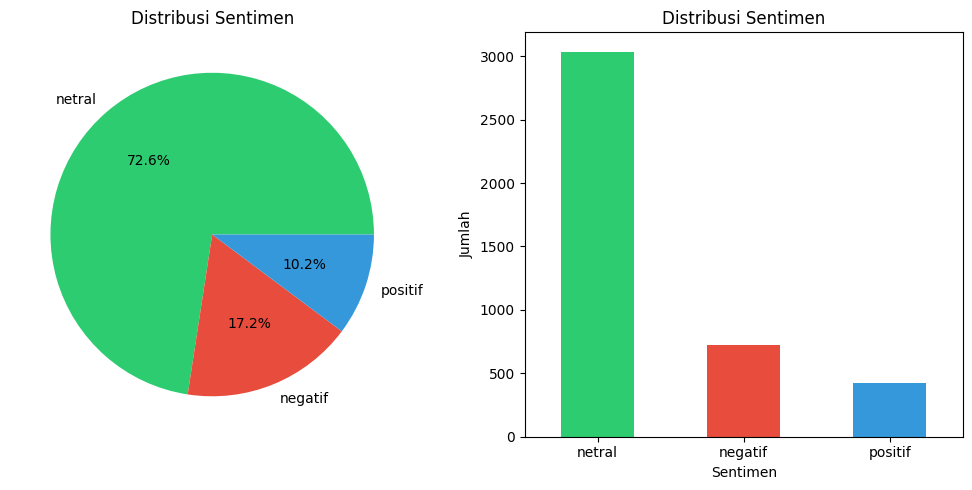

In [30]:
# Visualisasi distribusi sentimen
plt.figure(figsize=(10, 5))

# Pie chart
plt.subplot(1, 2, 1)
sentiment_counts = df['sentiment'].value_counts()
colors = ['#2ecc71', '#e74c3c', '#3498db']  # hijau, merah, biru
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribusi Sentimen')

# Bar chart
plt.subplot(1, 2, 2)
sentiment_counts.plot(kind='bar', color=colors)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('output/distribusi_sentimen_kmeans.png', dpi=150, bbox_inches='tight')
plt.show()

In [31]:
# Preview data final
df[['cleaned_text', 'preprocessed_text', 'cluster_label', 'sentiment']].head(10)

,cleaned_text,preprocessed_text,cluster_label,sentiment
0,ditarik karna blm lolos bpom menurut sertifika...,ditarik karna lolos bpom menurut sertifikasi h...,0,netral
1,guyssss untuk kalian yang punya usaha makananm...,guyssss punya usaha makananminuman didaftarin ...,0,netral
2,umkm wajib tahu batas sertifikasi halal kian d...,umkm wajib tahu batas sertifikasi halal kian d...,0,netral
3,minimal lu taulah audience indo kek gimana soa...,minimal taulah audience indo kek gimana soal m...,0,netral
4,jepang secara aktif mempromosikan makanan hala...,jepang aktif mempromosikan makanan halal menar...,0,netral
5,urus izin halal mie instan ingin mengurus peri...,urus izin halal mie instan mengurus perizinan ...,0,netral
6,sertifikasi halal memperkuat daya saing indust...,sertifikasi halal memperkuat daya saing indust...,0,netral
7,memiliki sertifikasi halal artinya kamu tidak ...,memiliki sertifikasi halal artinya ragu membel...,0,netral
8,terus terang saja sertifikasi halal tujuannya ...,terus terang sertifikasi halal tujuannya duit ...,0,netral
9,info yang jual usaha makanan belum sertifikasi...,info jual usaha makanan sertifikasi halal dongg,0,netral


In [32]:
# Simpan hasil clustering
df.to_csv("data/hasil_clustering.csv", index=False)
print("Data berhasil disimpan ke data/hasil_clustering.csv")

Data berhasil disimpan ke data/hasil_clustering.csv


In [33]:
# Simpan TF-IDF matrix dan vectorizer untuk Naive Bayes
import pickle
import os

# Buat folder output jika belum ada
os.makedirs('output/models', exist_ok=True)

# Simpan vectorizer
with open('output/models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Simpan TF-IDF matrix
from scipy import sparse
sparse.save_npz('output/models/tfidf_matrix.npz', tfidf_matrix)

print("TF-IDF vectorizer dan matrix berhasil disimpan")

TF-IDF vectorizer dan matrix berhasil disimpan


## Ringkasan Hasil K-Means Clustering

In [34]:
print("="*60)
print("RINGKASAN HASIL K-MEANS CLUSTERING")
print("="*60)
print(f"\nJumlah data: {len(df)}")
print(f"Jumlah cluster: {n_clusters}")
print(f"Silhouette Score: {final_silhouette:.4f}")
print(f"\nDistribusi Sentimen:")
for sentiment, count in df['sentiment'].value_counts().items():
    pct = count / len(df) * 100
    print(f"  {sentiment}: {count} ({pct:.1f}%)")

RINGKASAN HASIL K-MEANS CLUSTERING

Jumlah data: 4183
Jumlah cluster: 3
Silhouette Score: 0.0391

Distribusi Sentimen:
  netral: 3036 (72.6%)
  negatif: 720 (17.2%)
  positif: 427 (10.2%)
